<img src="GaussFormel.jpg" width="600" height="200" align="right"/>

# MC Gauß 

Author: Christoph Guettner

**Abstract**  
The central limit theorem makes the _Gaussian Normal  
Distribution_ one of most important concepts in   
probability theory. MC Gauß provides a complete Monte  
Carlo generated approach to the normal density function.  
While we usually differentiate between two constant terms  
  
e: Euler number  
$\pi$: Kreiszahl (number of circles)
  
and two model parameters  
  
$\mu$: mean  
$\sigma$: variance  

the MC Gauß approch takes all four varibles as random variables. 

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)

* [Monte Carlo Methods](#Model_Selection)
    * [e: Euler number](#Euler_umber)
    * [$\pi$: Pi](#Pi_(number_of_circles))
    * [Central Limit Theorem](#Central_Limit_Theorem)
    * [Gaussian Distribution](#Gaussian_Distribution)
    * [Compined Plot](#Combined_Plot)
    

## Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [39]:
# required functions
def get_Gaussian_Sample(n_samples, sample_size=100):
    uni = np.random.uniform(-20,20,n_samples)
    gauss_samples = [np.mean(np.random.choice(uni, sample_size)) for i in range(n_samples)]
    return gauss_samples

def get_mean(n_samples, sample_size):
    mean=np.sum(get_Gaussian_Sample(n_samples, sample_size))/n_samples
    return mean

def get_variance(n_samples, sample_size):
    gs = get_Gaussian_Sample(n_samples, sample_size)
    mean = get_mean(n_samples, sample_size)
    var=0.0
    for i in range(len(gs)):
        var += (gs[i] - mean)**2
        #print(var)
    return var/len(gs)

def get_Euler(n_samples):
    Count =[]
    for i in range(n_samples):
        sum = 0.0
        count = 0
        while sum<1:
            a = np.random.random()
            sum += a
            count += 1
        Count.append(count)

    euler = np.sum(Count) / len(Count)
    return euler

def get_pi(n_samples):
    PI = 0.0
    hit = 0
    for i in range(n_samples):
        x = np.random.random()
        y = np.random.random()
        if (1.0 >= (x**2 + y**2)):
            hit += 1
    PI= 4.0 * hit / n_samples
    return PI


def get_gaussian_distribution(n_samples, sample_size):
    mean = get_mean(n_samples, sample_size)
    uni=np.linspace(-20,20,n_samples)
    Z = [(uni[i] - mean)**2 for i in range(n_samples)]/(2*get_variance(n_samples, sample_size)**2)
    return 1/(np.sqrt(2*get_variance(n_samples, sample_size)*get_pi(n_samples)))*get_Euler(n_samples)**(-Z)
    #return 1/(np.sqrt(2*get_variance(n_samples, sample_size)*np.pi))*np.e**(-Z)

def plot_hist(list, title):
    fig = plt.figure(figsize=(5,5), facecolor='#3F6F76')
    plt.hist(list, bins=40, color='#C65840', edgecolor='#43362A' )
    plt.title(title)
    plt.show()

def plot_distribution(x,y, title):
    fig = plt.figure(figsize=(5,5), facecolor='#3F6F76')
    plt.plot(x,y, color='#4052BD')
    plt.title(title)
    plt.xlim(-8,8)
    plt.show()

def multiplot_combined(x,y,list,title, subtitle, xlim):
    fig, axes = plt.subplots(1,3, figsize=(15,5), facecolor='#3F6F76')
    fig.suptitle(title, color ='0.7')
    for i,ax in enumerate(axes.flatten()):
        ax.hist(list[i], bins=40, density=True, alpha=0.8, color='#C65840', edgecolor='#43362A')
        ax.plot(x,y[i], color='#4052BD')
        ax.set_title(subtitle[i])
        ax.set_xlim(xlim[i])
    plt.show()

In [15]:
n_samples=10_000
sample_size=100

## Euler Number e

The Euler number (irrational constant) results as the limit of one of the two following sequences 

$e= \sum_{k=0}^\infty \frac{1}{k!}$ or $e = \lim \limits_{n \to \infty}(1+\frac{1}{n})^n$

Additionally, there also exists a random process that generates the Euler number. Therefore  
a set of random number $x_i = (0,1)$ is summed up until the sum is grater than 1. The number  
of required summands is counted and the avarage of 10 000 trials is taken to approximate e.



In [16]:
Euler_Sample = []
for i in range(n_samples):
    e= get_Euler(n_samples)
    Euler_Sample.append(e)




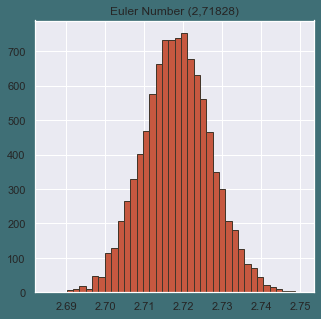

In [43]:
list = Euler_Sample
title = 'Euler Number (2,71828)'

plot_hist(list, title)

In [18]:
e = get_Euler(100*n_samples)
e

2.719102

## Pi_(number_of_circles)

The number $\pi=3,14,159$ describes the relationship between the circumference or perimeter of the circle (c) and the diameter of the circle (d) in the follwoing way.
  
$\pi = \frac{c}{d}$  

Here again, we use a well known Monte Carlo Method to estimate $\pi$.


In [19]:
Pi_Sample = []
for i in range(n_samples):
    pi = get_pi(n_samples)
    Pi_Sample.append(pi)


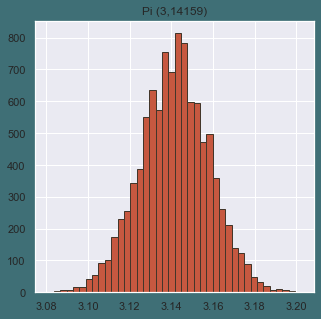

In [20]:
list = Pi_Sample 
title = 'Pi (3,14159)'

plot_hist(list, title)

In [21]:
pi = get_pi(100*n_samples)
pi

3.138916

## Central_Limit_Theorem

Here we take a uniform distribution between [-20,20] and take 10000 sample of size 30. The plot shows the resulting distriubtion of sample means. 

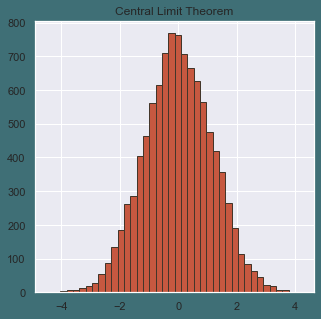

In [23]:
list=get_Gaussian_Sample(n_samples, sample_size)
title = 'Central Limit Theorem'

plot_hist(list, title)


## Gaussian_Distribution

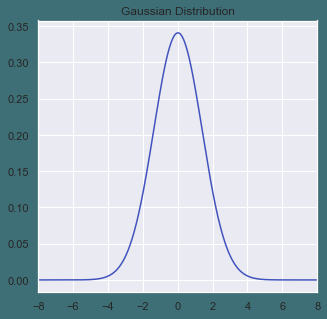

In [29]:

x = np.linspace(-20,20,n_samples)
y= get_gaussian_distribution(n_samples, sample_size)
title='Gaussian Distribution'

plot_distribution(x,y, title)


## Combined_Plot

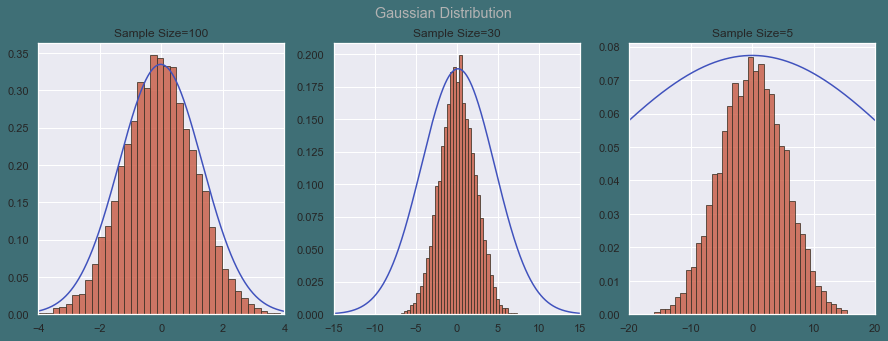

In [42]:
x = np.linspace(-20,20,n_samples)
y= [get_gaussian_distribution(n_samples, sample_size),get_gaussian_distribution(n_samples, sample_size=30),get_gaussian_distribution(n_samples, sample_size=5)] 
list = [get_Gaussian_Sample(n_samples, sample_size),get_Gaussian_Sample(n_samples, sample_size=30),get_Gaussian_Sample(n_samples, sample_size=5)] 
subtitle=['Sample Size=100','Sample Size=30','Sample Size=5']
title='Gaussian Distribution'
xlim=[(-4,4), (-15,15),(-20,20) ]

multiplot_combined(x,y,list,title, subtitle, xlim)
